<a href="https://colab.research.google.com/github/EssaddekOthmane/Deep-Learning/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
Un réseau de neurones artificiels, ou réseau neuronal artificiel, est un système dont la conception est à l'origine schématiquement inspirée du fonctionnement des neurones biologiques.

Les réseaux de neurones sont généralement optimisés par des méthodes d'apprentissage de type probabiliste, en particulier bayésien. Ils sont placés d'une part dans la famille des applications statistiques, qu'ils enrichissent avec un ensemble de paradigmes permettant de créer des classifications rapides (réseaux de Kohonen en particulier), et d'autre part dans la famille des méthodes de l'intelligence artificielle auxquelles ils fournissent un mécanisme perceptif indépendant des idées propres de l'implémenteur, et des informations d'entrée au raisonnement logique formel.

En modélisation des circuits biologiques, ils permettent de tester quelques hypothèses fonctionnelles issues de la neurophysiologie, ou encore les conséquences de ces hypothèses pour les comparer au réel.

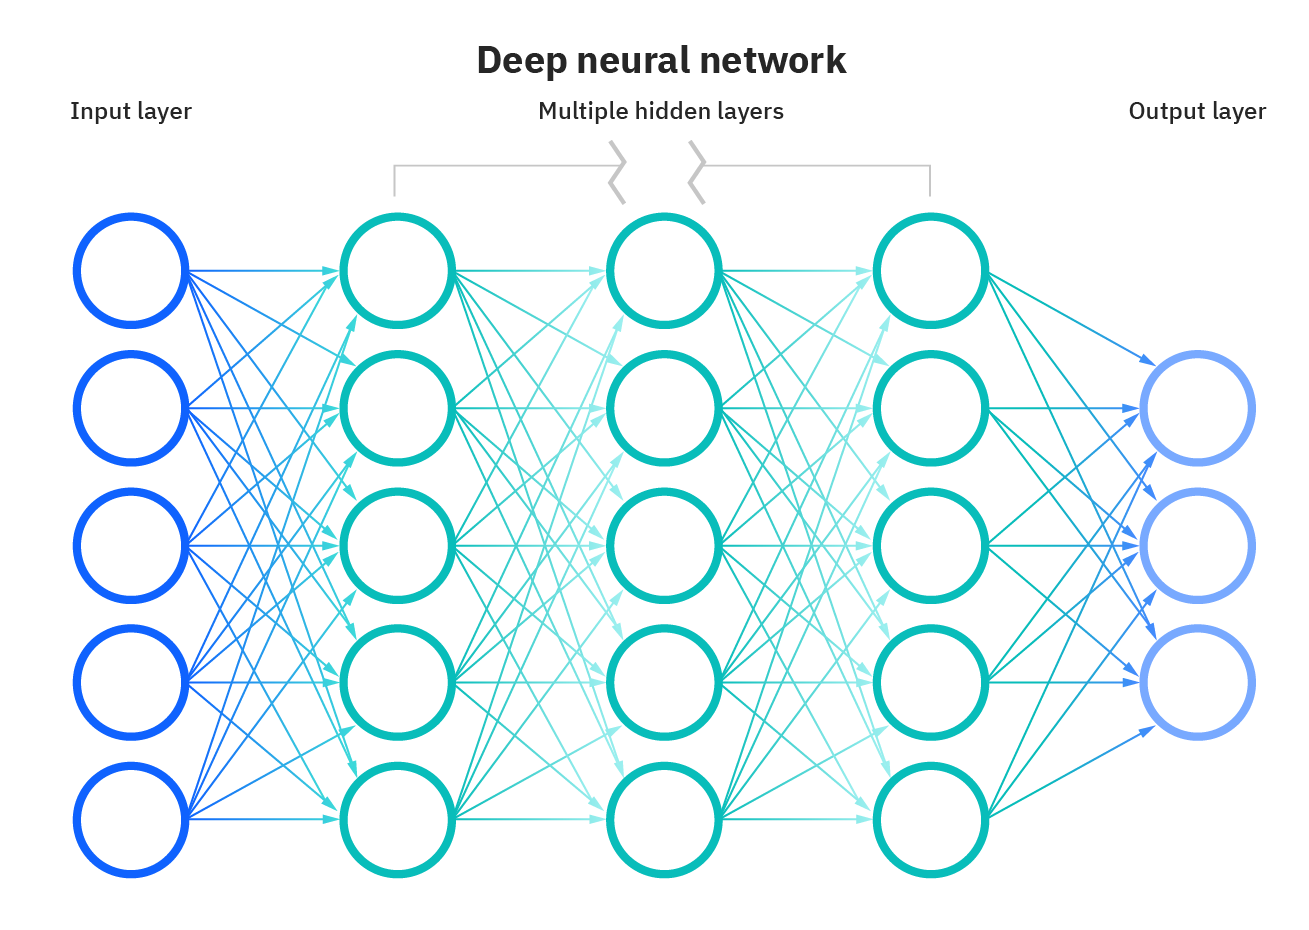

##Comment fonctionnent les réseaux neuronaux ?

De façon très réductrice, un neurone biologique est une cellule qui se caractérise par

• des synapses, les points de connexion avec les autres neurones, fibres
nerveuses ou musculaires ;

• des dentrites ou entrées du neurones ;

• les axones, ou sorties du neurone vers d’autres neurones ou fibres musculaires ;

• le noyau qui active les sorties en fonction des stimulations en entrée.

Par analogie, le neurone formel est un modèle qui se caractérise par un état
interne $s ∈ S$, des signaux d’entrée $x_1, . . . , x_p$ et une fonction d’activation

$$s = h(x1, . . . , xp) = g(\alpha_0+∑_{i=1}^p\alpha_ix_i)$$

La fonction d’activation opère une transformation d’une combinaison affine
des signaux d’entrée, $α_0$, terme constant, étant appelé le biais du neurone.
Cette combinaison affine est déterminée par un vecteur de poids $[α_0, . . . , α_p]$
associé à chaque neurone et dont les valeurs sont estimées dans la phase d’apprentissage. Ils constituent la mémoire ou connaissance répartie du réseau.

• linéaire g est la fonction identité,

• seuil g(x) = $1[0,+∞[(x)$,

• sigmoïde g(x) = $1/(1 + e^-x)$,

• ReLU g(x) = $max(0, x)$ (rectified linear unit),

• softmax $g(x)j =e^{x_j}/∑_{k=0}^kx_k$,

• radiale g(x) = $\sqrt{1/2πe^{−x^2/2}}$,

• . . .




## Application sur une BD à cible multiple



In [2]:

import io
import pandas as pd
from google.colab import files
import datetime

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import altair as alt

In [ ]:
!pip install scikeras
!pip install tensorflow
!pip install keras

In [8]:
df=pd.read_excel("DB aout - Copie.xlsx")

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum().sum()

21

In [11]:
df=df.dropna()
df = df.sample(frac = 1)

print(df.columns)

Index(['date', 'time', 'code', 'MIB', 'S0_F0', 'S1_F0', 'S2_F0', 'S3_F0',
       'S4_F0', 'S5_F0', 'S6_F0', 'S7_F0', 'S8_F0', 'S9_F0', 'S10_F0',
       'S11_F0', 'S12_F0', 'S13_F0', 'S14_F0', 'S0_F1', 'S0_F2', 'S0_F3',
       'S0_F4', 'S1_F1', 'S1_F2', 'S1_F3', 'S1_F4', 'S2_F1', 'S2_F2', 'S2_F3',
       'S2_F4', 'S3_F1', 'S3_F2', 'S3_F3', 'S3_F4', 'S4_F1', 'S4_F2', 'S4_F3',
       'S4_F4', 'S5_F1', 'S5_F2', 'S5_F3', 'S5_F4', 'S6_F1', 'S6_F2', 'S6_F3',
       'S6_F4', 'S7_F1', 'S7_F2', 'S7_F3', 'S7_F4', 'S8_F1', 'S8_F2', 'S8_F3',
       'S8_F4', 'S9_F1', 'S9_F2', 'S9_F3', 'S9_F4', 'S10_F1', 'S10_F2',
       'S10_F3', 'S10_F4', 'S11_F1', 'S11_F2', 'S11_F3', 'S11_F4', 'S12_F1',
       'S12_F2', 'S12_F3', 'S12_F4', 'S13_F1', 'S13_F2', 'S13_F3', 'S13_F4',
       'S14_F1', 'S14_F2', 'S14_F3', 'S14_F4', 'S0_F5', 'S1_F5', 'S2_F5',
       'S3_F5', 'S4_F5', 'S5_F5', 'S6_F5', 'S7_F5', 'S8_F5', 'S9_F5', 'S10_F5',
       'S11_F5', 'S12_F5', 'S13_F5', 'S14_F5', 'ref1', 'ref2'],
      dtype='object')

In [12]:
columns=[ 'S0_F0', 'S1_F0', 'S2_F0', 'S3_F0',
       'S4_F0', 'S5_F0', 'S6_F0', 'S7_F0', 'S8_F0', 'S9_F0', 'S10_F0',
       'S11_F0', 'S12_F0', 'S13_F0', 'S14_F0', 'S0_F1', 'S0_F2', 'S0_F3',
       'S0_F4', 'S1_F1', 'S1_F2', 'S1_F3', 'S1_F4', 'S2_F1', 'S2_F2', 'S2_F3',
       'S2_F4', 'S3_F1', 'S3_F2', 'S3_F3', 'S3_F4', 'S4_F1', 'S4_F2', 'S4_F3',
       'S4_F4', 'S5_F1', 'S5_F2', 'S5_F3', 'S5_F4', 'S6_F1', 'S6_F2', 'S6_F3',
       'S6_F4', 'S7_F1', 'S7_F2', 'S7_F3', 'S7_F4', 'S8_F1', 'S8_F2', 'S8_F3',
       'S8_F4', 'S9_F1', 'S9_F2', 'S9_F3', 'S9_F4', 'S10_F1', 'S10_F2',
       'S10_F3', 'S10_F4', 'S11_F1', 'S11_F2', 'S11_F3', 'S11_F4', 'S12_F1',
       'S12_F2', 'S12_F3', 'S12_F4', 'S13_F1', 'S13_F2', 'S13_F3', 'S13_F4',
       'S14_F1', 'S14_F2', 'S14_F3', 'S14_F4', 'S0_F5', 'S1_F5', 'S2_F5',
       'S3_F5', 'S4_F5', 'S5_F5', 'S6_F5', 'S7_F5', 'S8_F5', 'S9_F5', 'S10_F5',
       'S11_F5', 'S12_F5', 'S13_F5', 'S14_F5']


X=df[columns].values
Y1=df['ref1'].values.reshape(-1, 1)
Y2=df['ref2'].values.reshape(-1, 1)

In [13]:


X_train, X_test = train_test_split(df[columns], test_size=0.2, random_state=42, shuffle=True)
trainScaler=StandardScaler()

y_train, y_test = train_test_split(df[['ref1', 'ref2']], test_size=0.2, random_state=42, shuffle=True)
trainScaler=StandardScaler()


X_trainScaler=StandardScaler()
X_testScaler=StandardScaler()
y1_trainScaler=StandardScaler()
y1_testScaler=StandardScaler()

 
 
X_trainScalerFit=X_trainScaler.fit(X_train)
X_testScalerFit=X_testScaler.fit(X_test)
y1_trainScalerFit=y1_trainScaler.fit(y_train)
y1_testScalerFit=y1_testScaler.fit(y_test)


X_train=X_trainScalerFit.transform(X_train)
X_test=X_testScalerFit.transform(X_test)
y_train=y1_trainScalerFit.transform(y_train)
y_test=y1_testScalerFit.transform(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
 




(1403, 90)
(1403, 2)
(351, 90)
(351, 2)


In [14]:

PredictorScaler=StandardScaler()
TargetVarScaler1=StandardScaler()
TargetVarScaler2=StandardScaler()
 

PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit1=TargetVarScaler1.fit(Y1)
TargetVarScalerFit2=TargetVarScaler2.fit(Y2)
 

X=PredictorScalerFit.transform(X)
Y1=TargetVarScalerFit1.transform(Y1)
Y2=TargetVarScalerFit2.transform(Y2)
 


X_train1, X_test1, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)
X_train2, X_test2, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=42)
 

print(X_train.shape)
print(y1_train.shape)
print(y2_train.shape)
print(X_test.shape)
print(y1_test.shape)
print(y2_test.shape)

(1403, 90)
(1227, 1)
(1227, 1)
(351, 90)
(527, 1)
(527, 1)


In [81]:
class reg_model():

  from keras.models import Sequential
       
  def __init__(self,Input_shape,Output_shape):
        
        self.model=Sequential()
        self.output_shape=Output_shape
        self.input_shape=Input_shape
        self.history={}
        

        
  
  
  def make_layers(self,lenght,units,activations):

    x=Sequential()
    x.add(Dense(1000, input_shape=(self.input_shape,), activation='relu'))
    for i in range(lenght):
      x.add(Dense(units[i],activation=activations[i]))
    
    x.add(Dense(self.output_shape, activation='linear'))
    self.model=x
  
  def add_layer(self,units,activation):
        
        last_layer=self.model.layers[-1]
        x=Sequential()
        
        for layer in self.model.layers[:-1]: 
                x.add(layer)
                
        x.add(Dense(units, activation=activation))
        x.add(last_layer) 
        self.model=x
          
                
  
  def compile_model(self):
        self.model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
  
  
  def train_model(self,X_train, y_train,X_test, y_test,epochs):
        
        es = EarlyStopping(monitor='val_loss',
              mode='min',
              patience=50,
              restore_best_weights = True)


        history = self.model.fit(X_train, y_train,
                            validation_data = (X_test, y_test),
                            callbacks=[es],
                            epochs=epochs,
                            batch_size=50,
                            verbose=1)
        
        self.history=history
  
  
  
  def epoch_vs_losses(self):        

        history_dict = self.history.history
        dff=pd.DataFrame()
        dff['loss']=history_dict['loss'] 
        dff['val_loss'] = history_dict['val_loss']
        dff['epochs']= range(1, len(loss_values) + 1)
        line1=alt.Chart(dff).mark_line().encode(
            x='epochs',
            y='loss'
        )
        line2=alt.Chart(dff).mark_line(color='red').encode(
            x='epochs',
            y='val_loss'
        )

        altair_chart(line1+line2, use_container_width=True)

        loss_values = history_dict['loss'] 
        val_loss_values = history_dict['val_loss']
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, 'bo', label='Training loss')
        plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()



In [82]:
mode=reg_model(X_train1.shape[1],2)

In [83]:
mode.make_layers(2,[10,100],['relu','relu'])

In [84]:
mode.compile_model()

In [85]:
mode.train_model(X_train, y_train,X_test, y_test,10)

Epoch 1/10
29/29 [==============================] - 1s 12ms/step - loss: 0.9716 - mae: 0.7962 - val_loss: 0.9951 - val_mae: 0.7983
Epoch 2/10
29/29 [==============================] - 0s 6ms/step - loss: 0.8877 - mae: 0.7575 - val_loss: 0.9722 - val_mae: 0.7944
Epoch 3/10
29/29 [==============================] - 0s 7ms/step - loss: 0.8198 - mae: 0.7176 - val_loss: 1.0146 - val_mae: 0.8148
Epoch 4/10
29/29 [==============================] - 0s 7ms/step - loss: 0.7621 - mae: 0.6924 - val_loss: 0.9510 - val_mae: 0.7857
Epoch 5/10
29/29 [==============================] - 0s 7ms/step - loss: 0.7170 - mae: 0.6718 - val_loss: 0.9878 - val_mae: 0.8058
Epoch 6/10
29/29 [==============================] - 0s 7ms/step - loss: 0.6641 - mae: 0.6399 - val_loss: 1.0579 - val_mae: 0.8405
Epoch 7/10
29/29 [==============================] - 0s 7ms/step - loss: 0.6360 - mae: 0.6288 - val_loss: 1.0156 - val_mae: 0.8238
Epoch 8/10
29/29 [==============================] - 0s 7ms/step - loss: 0.5673 - mae: 0.5

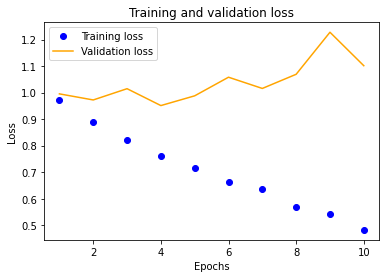

In [86]:
mode.epoch_vs_losses()

In [71]:
mode.model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1000)              91000     
                                                                 
 dense_30 (Dense)            (None, 10)                10010     
                                                                 
 dense_31 (Dense)            (None, 100)               1100      
                                                                 
 dense_32 (Dense)            (None, 2)                 202       
                                                                 
Total params: 102,312
Trainable params: 102,312
Non-trainable params: 0
_________________________________________________________________


In [33]:
m=Sequential()
m.add(Dense(2, activation='linear'))
layer=mode.model.layers[-1]
m.add(layer)

In [50]:

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='linear'))

In [58]:
last=model.layers[-1]
model.layers[-1]=Dense(20, activation='linear')

In [59]:
model.layers.append(last)

In [53]:
model.layers

In [55]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [57]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1000)              91000     
                                                                 
 dense_21 (Dense)            (None, 500)               500500    
                                                                 
 dense_22 (Dense)            (None, 250)               125250    
                                                                 
 dense_23 (Dense)            (None, 2)                 502       
                                                                 
Total params: 717,252
Trainable params: 717,252
Non-trainable params: 0
_________________________________________________________________


In [24]:
mode.compile_model()

In [ ]:

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='linear'))

In [ ]:
model1 = Sequential()
model1.add(Dense(1000, input_shape=(X_train1.shape[1],), activation='relu')) # (features,)
model1.add(Dense(500, activation='relu'))
model1.add(Dense(250, activation='relu'))
model1.add(Dense(1, activation='linear'))

model2 = Sequential()
model2.add(Dense(1000, input_shape=(X_train2.shape[1],), activation='relu')) # (features,)
model2.add(Dense(500, activation='relu'))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(1, activation='linear'))





In [ ]:
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [56]:
from keras.callbacks import EarlyStopping




es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)




history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)




Epoch 1/100
29/29 [==============================] - 2s 27ms/step - loss: 1.2286 - mae: 0.8713 - val_loss: 1.1668 - val_mae: 0.8486
Epoch 2/100
29/29 [==============================] - 1s 21ms/step - loss: 0.9048 - mae: 0.7612 - val_loss: 1.2244 - val_mae: 0.8691
Epoch 3/100
29/29 [==============================] - 1s 19ms/step - loss: 0.8734 - mae: 0.7486 - val_loss: 0.9854 - val_mae: 0.8095
Epoch 4/100
29/29 [==============================] - 1s 20ms/step - loss: 0.7551 - mae: 0.6976 - val_loss: 1.0702 - val_mae: 0.8210
Epoch 5/100
29/29 [==============================] - 1s 20ms/step - loss: 0.6921 - mae: 0.6626 - val_loss: 1.0416 - val_mae: 0.8399
Epoch 6/100
29/29 [==============================] - 1s 21ms/step - loss: 0.6049 - mae: 0.6174 - val_loss: 1.0672 - val_mae: 0.8178
Epoch 7/100
29/29 [==============================] - 1s 21ms/step - loss: 0.5283 - mae: 0.5714 - val_loss: 1.3052 - val_mae: 0.9021
Epoch 8/100
29/29 [==============================] - 1s 20ms/step - loss: 0.

In [ ]:
history1 = model1.fit(X_train1, y1_train,
                    validation_data = (X_test1, y1_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)



In [ ]:
history2 = model2.fit(X_train2, y2_train,
                    validation_data = (X_test2, y2_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)


In [ ]:
def epoch_vs_losses(history):
  history_dict = history.history
  loss_values = history_dict['loss'] 
  val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values) + 1) 
  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()



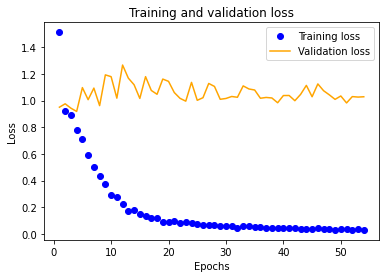

In [ ]:
epoch_vs_losses(history1)

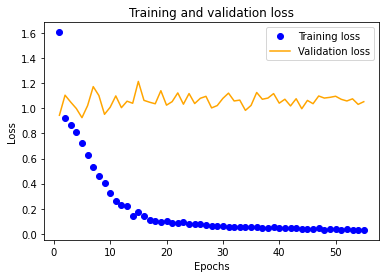

In [ ]:
epoch_vs_losses(history2)

In [ ]:
def bach_size(X_train, y_train,X_test, y_test):

  baches=[k for k in range(2,100) if k%2==0 and k%3!=0 and k%5!=0 and k%7!=0 and k%11!=0 and k%13!=0 ]
  loss=[]
  val_loss=[]
  i=len(baches)

  model = Sequential()
  model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
  model.add(Dense(500, activation='relu'))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(y_train.shape[1], activation='linear'))

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

  es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)


  for bach in baches:
    history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=bach,
                    verbose=0)
    history_dict = history.history
    loss.append(history_dict['loss'][-1])
    val_loss.append(history_dict['val_loss'][-1])
    print(i,history_dict['loss'][-1])
    i=i-1

  plt.plot(baches,loss)
  plt.show()
  plt.plot(baches,val_loss)
  plt.show()




In [ ]:
history_dict1['loss'][-1]

0.036767926067113876

18 0.08564622700214386
17 0.05630222707986832
16 0.03421027213335037
15 0.020269878208637238
14 0.011066725477576256
13 0.010296525433659554
12 0.008164669387042522
11 0.006484872195869684
10 0.006534958723932505
9 0.005733235273510218
8 0.004399640951305628
7 0.004251269623637199
6 0.003027078928425908
5 0.0037920046597719193
4 0.003013079287484288
3 0.0032230247743427753
2 0.0028396821580827236
1 0.0020961156114935875


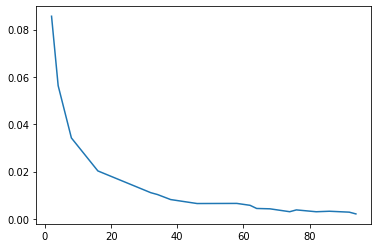

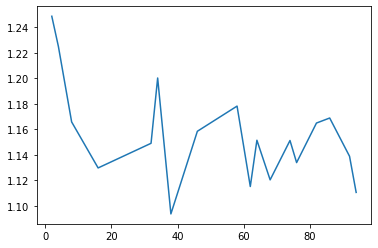

In [ ]:
bach_size(X_train1,y1_train,X_test1,y1_test)

In [ ]:



def plot_prediction(X_train,y_train,X_test,y_test,model):

  fig, axes = plt.subplots(1,2) # 1 row, 2 columns



  axes[0].scatter(x=y_train, y=model.predict(X_train)) 
  axes[0].set_xlabel("Actual", fontsize=10)
  axes[0].set_ylabel("Predicted",  fontsize=10)
  axes[0].set_title("Training")

  x = np.linspace(*axes[0].get_xlim())
  axes[0].plot(x, x, color='red')

  axes[1].scatter(x=y1_test, y=model.predict(X_test)) 
  axes[1].set_xlabel("Actual", fontsize=10)
  axes[1].set_ylabel("Predicted",  fontsize=10)
  axes[1].set_title("Validation")

  x = np.linspace(*axes[1].get_xlim())
  axes[1].plot(x, x, color='red')


  fig.tight_layout()


  plt.show()

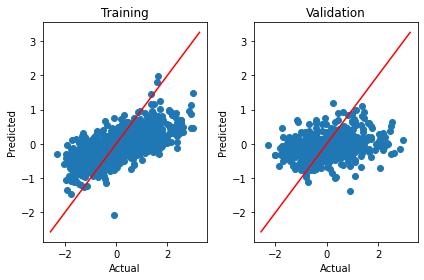

In [ ]:
plot_prediction(X_train1,y1_train,X_test1,y1_test,model1)

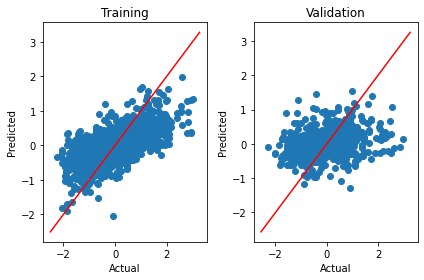

In [ ]:
plot_prediction(X_train2,y2_train,X_test2,y2_test,model2)

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:


def evaluate_model(X, y):


	n_inputs, n_outputs = X.shape[1], y.shape[1]
	model = Sequential()

	model.add(Dense(1000, input_shape=(n_inputs,), activation='relu')) # (features,)
	model.add(Dense(500, activation='relu'))
	model.add(Dense(250, activation='relu'))
	model.add(Dense(n_outputs, activation='linear'))

	model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

	es = EarlyStopping(monitor='val_loss',
										mode='min',
										patience=50,
										restore_best_weights = True)


	results = list()

	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

	for train_ix, test_ix in cv.split(X):

		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]


		model.fit(X_train, y_train, verbose=0, epochs=100)

		mae = model.evaluate(X_test, y_test, verbose=0)

		print( mae)
		results.append(mae[0])
	return results




results = evaluate_model(X, Y1)

print('MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))

[1.186161994934082, 0.868967592716217]
[0.14339643716812134, 0.29027995467185974]
[0.08631101995706558, 0.22361482679843903]
[0.02902045287191868, 0.13055385649204254]
[0.03163473680615425, 0.1263558566570282]
[0.021160604432225227, 0.10601484775543213]
[0.022656559944152832, 0.11214885115623474]
[0.015551738440990448, 0.0998096913099289]
[0.02390935830771923, 0.10482008755207062]
[0.016017289832234383, 0.09147919714450836]
[0.0267868023365736, 0.116273432970047]
[0.011026245541870594, 0.07654771208763123]
[0.018130509182810783, 0.09729905426502228]
[0.011976044625043869, 0.08209290355443954]
[0.010817042551934719, 0.07526758313179016]
[0.015956955030560493, 0.08308469504117966]
[0.0066266912035644054, 0.05778025463223457]
[0.007367625832557678, 0.06376159191131592]
[0.01077628880739212, 0.07289612293243408]
[0.01701834797859192, 0.09200281649827957]
[0.011816098354756832, 0.07232511788606644]
[0.007809082046151161, 0.0655430406332016]
[0.006493051070719957, 0.05712475627660751]
[0.008